# Data Science Internship
### Task : Prediction Using Decision Tree classifier
### Aim: Create A Decision Tree Classifier and predict correct class when added a new object..
# Auther : Satish Dixit

In [154]:
#importing all Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn import datasets

In [155]:
#loading data set
data=pd.read_csv(r"D:\data scince\iris.csv")

###  Data Analysis and  Preprocessing

In [156]:

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
data.tail(2)  

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [51]:
data.shape

(150, 5)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### EDA

In [58]:
num_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cat_cols=['species']

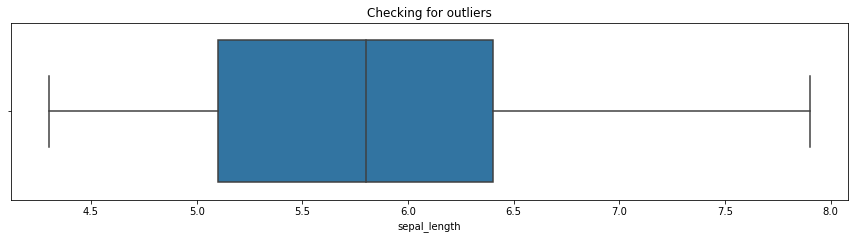

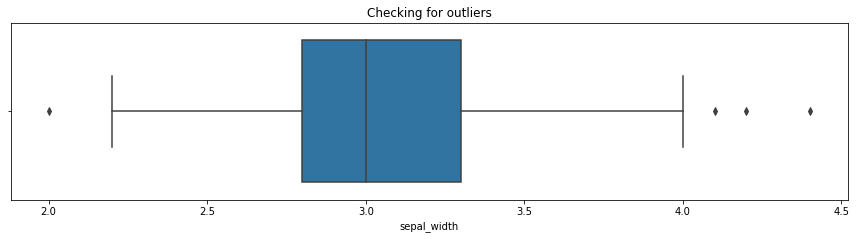

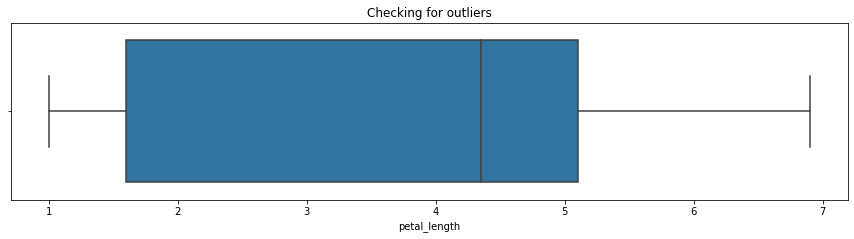

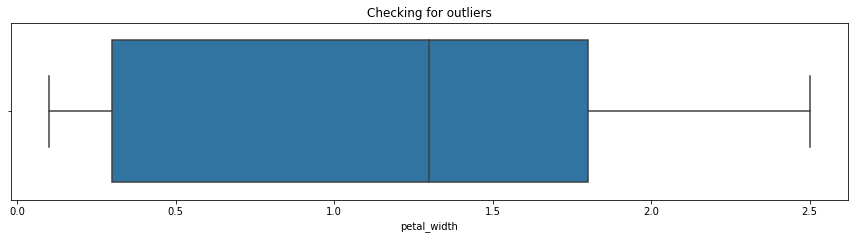

In [69]:
j=1
for i in num_cols:
    plt.figure(figsize=(15,15))
    plt.subplot(4,1,j)
    plt.title("Checking for outliers")
    sns.boxplot(x=i,data=data)
    plt.show()
    j +=1

###  Observation : data is normally distributed (almost). Slight skewness is present which can be treated by box cox or log transformation. but we are going with the raw data.

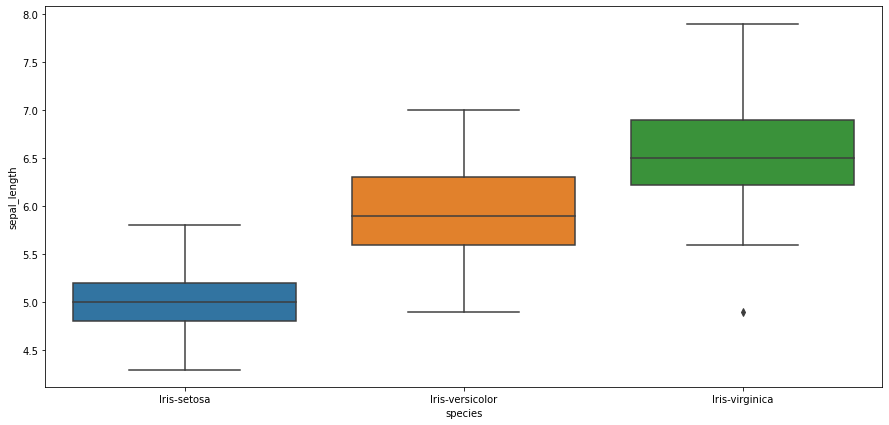

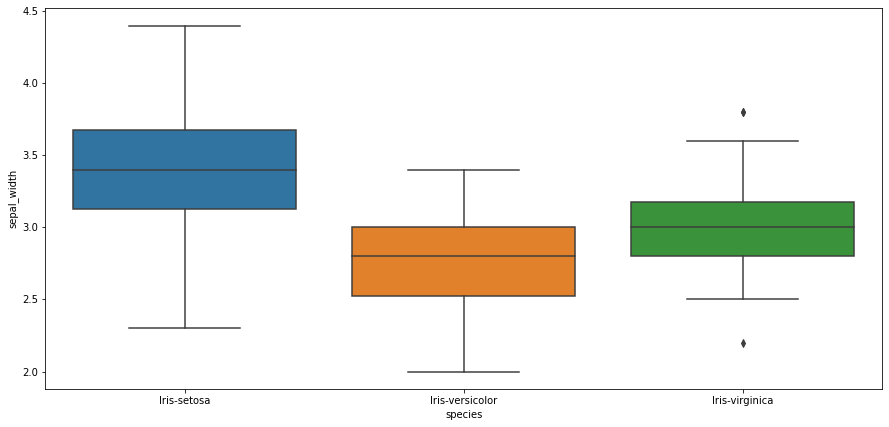

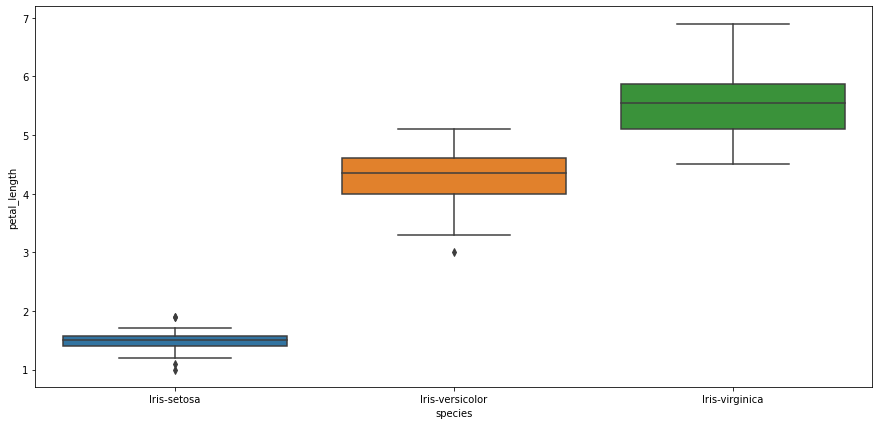

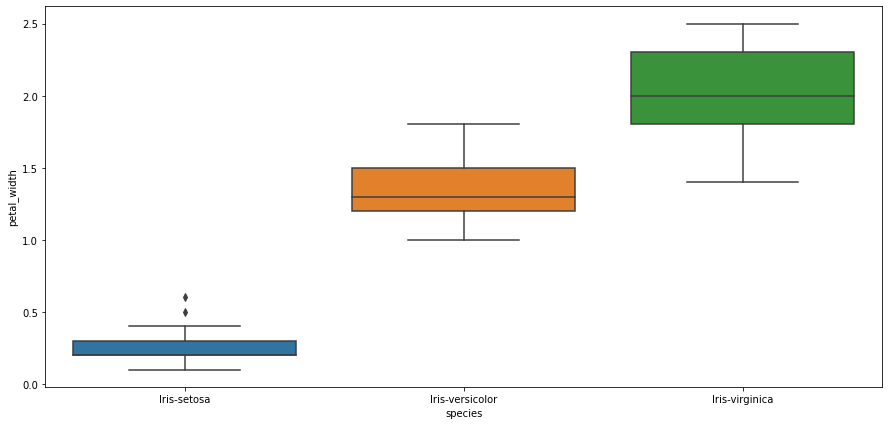

In [126]:
for i in num_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(x='species',y=i,data=data)
    plt.show()

####  future ref

def barh(ax):
    for p in ax.patches:
        val=p.get_height()
        x=p.get_x()+p.get+width()/2
        y=p.get_x()+p.get_height()-10
        ax.annotate(round(val,2)(x,y))
        
        
plt.figure(figsize=(10,6))
ax0=sns.countplot(x=data['species'],order=data['species'].value_counts().index)
barh(ax0)
plt.show()'''

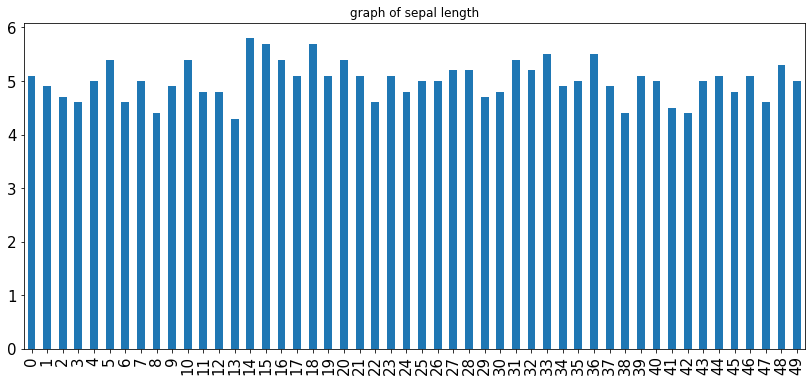

In [122]:
sl=data["sepal_length"].head(50)
sl.plot(kind="bar",figsize=(14,6),fontsize=15)
plt.title("graph of sepal length")
plt.show()

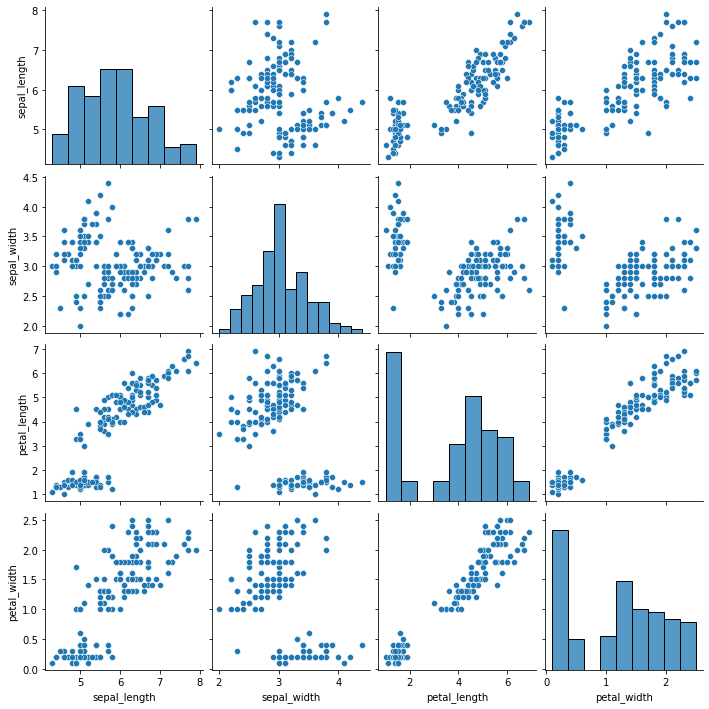

In [110]:
sns.pairplot(data=data)

###  Observation :

1.Sepal length petal length ,petal width have high influece in classifying the iris-verginica

2.Sepal wodth has high influance in classifying the iris setosa.

## Encoding Catogorical variables

In [141]:
cat_enc={'Iris-virginica':0,'Iris-setosa':1,'Iris-versicolor':2}
data["species"]=data["species"].replace(cat_enc)
data.head()    

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


###  Creating Dependent and independent variables x , y

In [142]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=['species'])
y=data["species"]
y

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int64

In [143]:
# Spliting Data into TRain and test data sets.
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size=.3,random_state=2)

### Doing Cross Verification for better result

In [144]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier(class_weight='balanced',random_state=100)

### Traing And fiting the model

In [145]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

###  Evaluate the tree

In [146]:
y_predict=model.predict(x_test)
print(y_predict)

[1 1 0 1 1 2 1 0 0 1 1 1 1 1 2 2 1 2 0 2 0 2 0 2 2 1 1 0 1 0 0 1 2 0 2 1 0
 2 2 0 2 2 0 2 1]


In [147]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9555555555555556

In [153]:
# campareing Actual and predict 

Result_df= pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
Result_df.head(10)

,Actual,Predicted
6,1,1
3,1,1
113,0,0
12,1,1
24,1,1
129,0,2
25,1,1
108,0,0
128,0,0
45,1,1


##  Plotting Decision Treee

[Text(133.92000000000002, 195.696, 'X[2] <= 2.35\ngini = 0.666\nsamples = 105\nvalue = [37, 33, 35]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [37, 0, 35]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 4.95\ngini = 0.149\nsamples = 37\nvalue = [3, 0, 34]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(100.44000000000001, 65.232, 'X[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [34, 0, 1]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(267.8

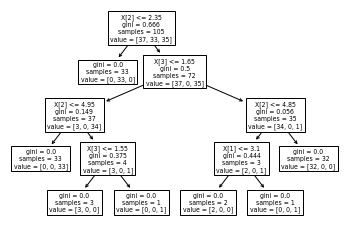

In [148]:
tree.plot_tree(model)

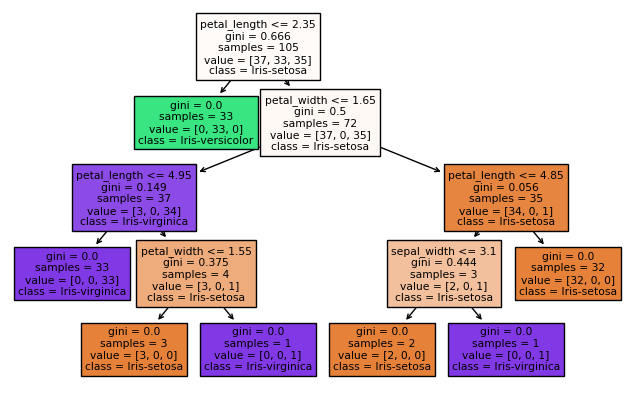

In [149]:
import matplotlib.pyplot as plt
num_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cat_cols=['Iris-setosa','Iris-versicolor','Iris-virginica']

fig, axes= plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=100)
tree.plot_tree(model,feature_names=num_cols,class_names=cat_cols,filled=True)
fig.savefig('iris_tree.png')

##  Thank you....